# Analyzing the retrievals of full LES cases
- 3 ways being used
1. Native resolution
2. Domain-averaged 
3. Native resolution-single pixel

In [2]:
#from pol_ret_analysis import *
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
from cpnLES_MSCARTlib import LES_case
from cpnRetrievalslib import  Pol_ret_P12Lib
import cpnCommonlib as cpn
cpn.setup_figures(plt)
#case definitions
sza='140'
vza=0
band='0p860'
method='Breon' #see Pmat help 

#Loading P12 library
P12Lib=Pol_ret_P12Lib(fname='Pol_ret_PM_library_0p860_2p13_V3.hdf5')
P12Lib.loadP12Lib()

#Reading RT simulations
'''
LEScase=LES_case('DYCOMS2_dharma_008036_b'+band+'_MSCART_SZA'+str(sza)+'_SAA000_VAA000plus_NPH2e6.hdf5',\
                 '/umbc/xfs1/zzbatmos/users/charaj1/LES_MSCART_v2/',\
                 RT1Dname='DYCOMS2_dharma_008036_b'+band+'_MSCART_1D_bins_SZA'+str(sza)+'_SAA000_VAA000plus_NPH1e5.hdf5')
'''
LEScase=LES_case('ATEXc_dharma_007877_b'+band+'_MSCART_SZA'+str(sza)+'_SAA000_VAA000plus_NPH1e6.hdf5',\
                 '/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/ATEXc/',\
                 RT1Dname='ATEXc_dharma_007877_b'+band+'_MSCART_1D_bins_SZA'+str(sza)+'_SAA000_VAA000plus_NPH1e5.hdf5')
#Reading NJK retrievals
ret_save_dir='/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/Retrievals/NJK_retrievals/data/'
NJK=cpn.load_obj(ret_save_dir+'NJK_retrievals_DYCOMS2_dharma_008036_b2p13_b0p860_MSCART_SZA'+sza+'_SAA000_VAA000plus_NPH2e6',\
                           encoding='latin1')

/umbc/xfs1/zzbatmos/users/charaj1/taki/softs/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Attempting to read <class 'cpnRetrievalslib.NJK_retrievals'>


In [8]:
#ATEXc cases with high Rp MC noise
arr=np.array([[ 13,  14,  14,  14,  25,  26,  27,  27,  28,  28,  28,  28,  29,
         29,  30,  30,  31,  31,  31,  32,  33,  33,  34,  34,  35,  35,
         36,  36,  36,  37,  37,  37,  38,  38,  39,  73,  74,  74,  75,
         75,  76, 102, 102, 103, 103, 105, 105, 105, 106, 116, 116, 116,
        116, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118, 118,
        119, 119, 119, 119, 120, 120, 120, 120, 120, 121, 121, 121, 121,
        121, 122, 122, 122, 122, 122],
       [ 52,  52,  53,  54,  58,  94,  94,  95,  92,  93,  94,  96,  93,
         95,  93, 112, 109, 111, 112, 108, 110, 112, 109, 110, 107, 109,
        109, 110, 111, 108, 109, 110, 111, 113, 112,  80,  79,  80,  69,
         79,  79,  78,  79,  79,  80,  78,  79,  80,  79,  75,  77,  79,
         83,  74,  75,  77,  81,  83,  73,  74,  76,  78,  81,  82,  83,
         72,  76,  80,  84,  74,  75,  77,  80,  81,  77,  78,  79,  80,
         82,  76,  77,  78,  79,  80]])

## Native resolution retrievals

Attempting to read <class 'dict'>
Pol. ret. method: Breon primaryBow: True
either one angle has only one occurrence
figures/ATEXc_dharma_007877_b0p860_MSCART_1D_bins_SZA140_SAA000_VAA000plus_NPH1e6_Breon_full_pol_ret_V5_MPI_checking_fitX120Y76_x6p0y3p8.png SAVED.


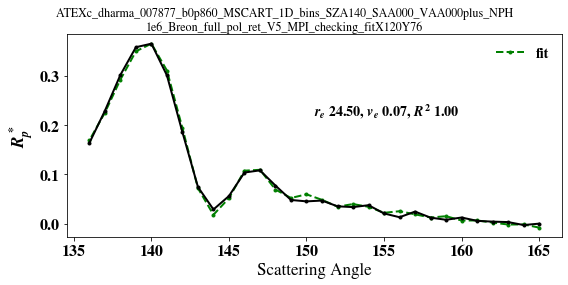

In [65]:
from pol_ret_analysis import check_fit2
#Reading Polarimetric retrievals
#Without primary bow
'''
path='results/pol_ret_V4/'
filename='DYCOMS2_dharma_008036_b0p860_MSCART_1D_bins_SZA'+SZA+'_SAA000_VAA000plus_NPH2e6_Breon_full_pol_ret_V4_MPI'; primaryBow=False
'''
#With primary bow
path=''
#filename='DYCOMS2_dharma_008036_b0p860_MSCART_SZA120_SAA000_VAA000plus_NPH2e6_Breon_full_pol_ret_V5_MPI'; primaryBow=True
filename='ATEXc_dharma_007877_b0p860_MSCART_1D_bins_SZA140_SAA000_VAA000plus_NPH1e6_Breon_full_pol_ret_V5_MPI';primaryBow=True
#filename='ATEXc_dharma_007877_b0p860_MSCART_SZA140_SAA000_VAA000plus_NPH1e6_Breon_full_pol_ret_V5_MPI';primaryBow=True
data=cpn.load_obj(path+filename,encoding='latin1')

ret_Re=data['ret_Re']
ret_Ve=data['ret_Ve']
abc   =data['abc']
Qls   =data['Qls']
Rsq   =data['Rsq']
yAll  =data['yAll']
x     =data['x']


#X,Y=arr[0,j],arr[1,j]
X,Y=120,76
Q_in2= LEScase.RT.MeanPRad[:,X,Y,1]
abc=abc[X,Y,:]
ret_Re=ret_Re[X,Y]
ret_Ve=ret_Ve[X,Y]
Rsq=Rsq[X,Y]
fig1_ttl=filename+'_checking_fitX%dY%d'%(X,Y)

fig1,ax1=check_fit2(yAll[X,Y],x,abc,ret_Re,ret_Ve,Rsq,P12Lib,LEScase,method,primaryBow=primaryBow)
'''
#Overplot different re ve pattern from the libarary
P=Pmat(P12Lib.re,P12Lib.ve,P12Lib.bulk_Mie_ang,P12Lib.avP12['0p860'],LEScase.RT.ScatA,method=method,primaryBow=primaryBow)
P.set_reve(ret_Re,ret_Ve)
ax2=ax1.twinx()
ax2.plot(x,-P.getP(x),'r.-')
P.set_reve(24.84,0.08)
ax2.plot(x,-P.getP(x),'r.--')
P.set_reve(17.00,0.05)
ax2.plot(x,-P.getP(x),'r+--')
ax2.set_ylabel('-$P_{12}$',color='r')
'''
fig1.suptitle("\n".join(wrap(fig1_ttl,70)),size=12)
fig1.tight_layout(rect=[0,0,1,0.92])

cpn.savefig(fig1,fig1_ttl+'_x%0.1fy%0.1f'%(LEScase.xcens[X],LEScase.ycens[Y]),'figures/')

In [294]:
yAll[X,Y]

array([-0.01493127,  0.02755284, -0.0130213 , -0.05185294,  0.0264134 ,
        0.11819414,  0.08556806,  0.03892141,  0.12398105,  0.14462015,
        0.14095612,  0.13251377,  0.16232029,  0.25240532,  0.39158189,
        0.56047613,  0.59867113,  0.48438313,  0.2422878 ,  0.13913165,
        0.29075108,  0.75544687,  1.32268746,  1.8183012 ,  2.1078117 ,
        2.1254419 ,  1.92479422,  1.58880867,  1.28902934,  1.02397364])

## Domain average retrievals

Attempting to read <class 'dict'>
Pol. ret. method: Breon primaryBow: True
[-1.63670093 -0.19671222  0.5810861 ]


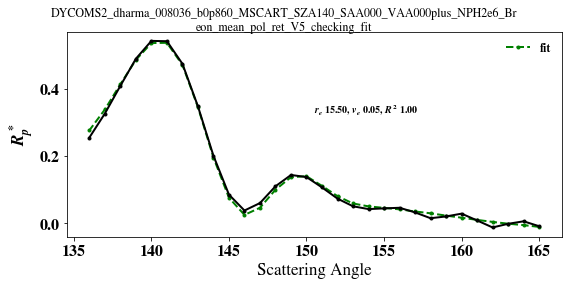

In [39]:
#Reading Polarimetric retrievals
#filename='DYCOMS2_dharma_008036_b0p860_MSCART_1D_bins_SZA140_SAA000_VAA000plus_NPH2e6_Breon_mean_pol_ret'
filename='DYCOMS2_dharma_008036_b0p860_MSCART_SZA140_SAA000_VAA000plus_NPH2e6_Breon_mean_pol_ret_V5'; primaryBow=True
data=cpn.load_obj(filename,encoding='latin1')
ret_Re=data['ret_Re']
ret_Ve=data['ret_Ve']
abc   =data['abc']
Qls   =data['Qls']
Rsq   =data['Rsq']
Q_in2= LEScase.RT.MeanPRad[:,:,:,1].mean(axis=1).mean(axis=1)
fig1_ttl=filename+'_checking_fit'
fig1,ax1=check_fit(Q_in2,abc,ret_Re,ret_Ve,Rsq,P12Lib,LEScase,method,primaryBow=primaryBow)
fig1.suptitle("\n".join(wrap(fig1_ttl,70)),size=12)
fig1.tight_layout(rect=[0,0,1,0.93])
print(abc)



## Native resolution single pixel
### (With and w/o primary bow)

Attempting to read <class 'dict'>
Pol. ret. method: Breon primaryBow: True
[-1.69887028 -0.18750292  0.56101659]


Replace existing file?:  y


figures/DYCOMS2_dharma_008036_b0p860_MSCART_1D_bins_SZA140_SAA000_VAA000plus_NPH2e6_Breon_pixelX120Y120_pol_ret_V5_checking_fit.png SAVED.


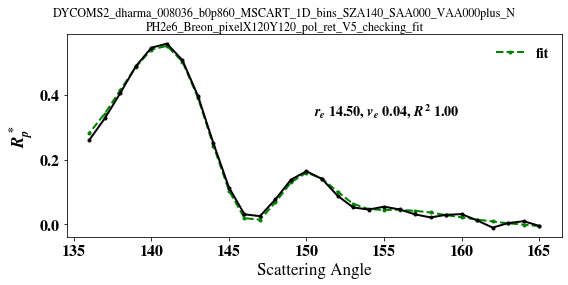

In [6]:
#Without primary bow
#filename='DYCOMS2_dharma_008036_b0p860_MSCART_1D_bins_SZA140_SAA000_VAA000plus_NPH2e6_Breon_pixelX120Y120_pol_ret'; primaryBow=False
#With primary bow
filename='DYCOMS2_dharma_008036_b0p860_MSCART_1D_bins_SZA140_SAA000_VAA000plus_NPH2e6_Breon_pixelX120Y120_pol_ret_V5'; primaryBow=True
X,Y=120,120
data=cpn.load_obj(filename,encoding='latin1')
ret_Re=data['ret_Re']
ret_Ve=data['ret_Ve']
abc   =data['abc']
Qls   =data['Qls']
Rsq   =data['Rsq']
yAll  =data['yAll']
x     =data['x']
Q_in2= LEScase.RT.MeanPRad[:,X,Y,1]
fig1_ttl=filename+'_checking_fit'
fig1,ax1=check_fit2(yAll,x,abc,ret_Re,ret_Ve,Rsq,P12Lib,LEScase,method,primaryBow=primaryBow)
fig1.suptitle("\n".join(wrap(fig1_ttl,70)),size=12)
fig1.tight_layout(rect=[0,0,1,0.92])
print(abc)
cpn.savefig(fig1,fig1_ttl,'figures/')

In [5]:
LEScase.RT1D.RMSEPRad.shape

(121,)

In [6]:
np.delete(LEScase.RT.RMSEPRad,60,0).shape

(120, 128, 128, 4)

# Performing and analyzing single column polarimetric retrievals
Directly MSCART first output of a single LES column is used to do polarimetric retrievals and check the fit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
from cpnRetrievalslib import fitBreon_noRsq as do_fitting
from cpnLES_MSCARTlib import POLCARTdset
from cpnRetrievalslib import Pol_ret_P12Lib, Pmat
from pol_cloud_ret import getGuess
import cpnCommonlib as cpn
cpn.setup_figures(plt)

Reading single column 1D MSCART results (separately)

In [103]:
'''
#ATEXc
RT=POLCARTdset('onecolumn','/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/ATEXc/1Druns/LESb0p860_bins/')
RT.readMSCARTplus('ATEXc_dharma_007877_b0p860y120x79_MSCART_SZA140_SAA000_VAA000plus_NPH1e5.nc',\
                  fdpath='/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/ATEXc/1Druns/results/LESb0p860_bins/',clm=True,prnt=False,step=True)
'''
#RICO
RT=POLCARTdset('onecolumn','/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/RICO/1Druns/LESb0p860_bins/')
RT.readMSCARTplus('RICO_dharma_005044_b0p860y40x40_MSCART_SZA160_SAA000_VAA000plus_NPH1e5.nc',\
                  fdpath='/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/RICO/1Druns/results/LESb0p860_bins/',clm=True,prnt=False,step=True)

Reading 3D MSCART results (separately)

In [179]:
'''
base_dir='/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/ATEXc/'
RT=POLCARTdset('LES3D',base_dir)
RT.readPOLCARThdf5('ATEXc_dharma_007877_b0p860_MSCART_SZA160_SAA000_VAA000plus_NPH1e6.hdf5',dpath=base_dir+'results/b0p860/')
'''
base_dir='/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/RICO/'
RT=POLCARTdset('LES3D',base_dir)
RT.readPOLCARThdf5('RICO_dharma_005044_b0p860_MSCART_SZA160_SAA000_VAA000plus_NPH1e6.hdf5',dpath=base_dir+'results/b0p860/')

/umbc/xfs1/zzbatmos/users/charaj1/taki/softs/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Reading complete LES case

In [124]:
from cpnLES_MSCARTlib import LES_case,DHARMA_onmp

#RICO
mie_path='/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_simulations/'
mie_name='RICO_dharma_005044_mie_470_860_2p13'
lesCname='RICO'
RC=DHARMA_onmp('dharma_005044.cdf','/umbc/xfs1/zzbatmos/users/charaj1/LES_simulations/RICO/Ackerman_RICO_NEW/')
RC.readDHARMA();RC.name='RICO'
RC.setup_dTau(mie_name,lesCname,mie_path=mie_path)
RC.set_cot_top(ctop_tau=1)
a=1;b=0;SZA=60;VZA=0;band=1;wvl={1:'0p860',2:'2p13'}
RC.setup_reVW(mie_name,lesCname,SZA,VZA,a=a,b=b,mie_path=mie_path,band=band,replace='0')
lc=LES_case('RICO_120_b0p860')
RT = lc.RT

self.c_mie created!
Make sure to give correct lesCname.
self.qe_avg, self.alb_av created
self.zTau, self.zTau0top created.
0.860 band selected to compute COT-based cloud top
COT-based domain cloud top: 2.82 km
self.cot_top setup successfully
self.c_mie created!
File name: dharma_005044_RICO_dharma_005044_mie_470_860_2p13_SZA060_VZA000_b0p860a1p0_b0p0
File already exist in: /umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_simulations/
Previous results will be loaded!


/umbc/xfs1/zzbatmos/users/charaj1/taki/softs/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


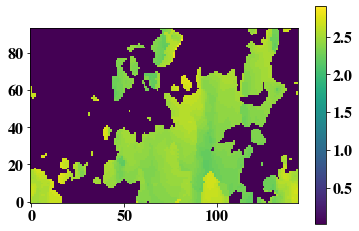

In [34]:
ctf = plt.imshow(RC.DHARMA.z[RC.cot_top[yi:,:]]/1e3,origin='lower')
plt.colorbar(ctf)

## Investigating potential parallax effects

/umbc/xfs1/zzbatmos/users/charaj1/taki/softs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


 vec_PRad_zlv(1) = 3.0


Replace existing file?:  y


figures/parallax/Cloudbow_line-of-sight_from_the_sensor_for_varying_SZA_at_x85y50.png SAVED.


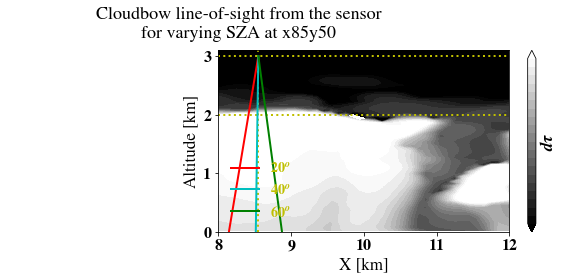

In [139]:
xi,yi = 85,50
z = RC.DHARMA.z
x,y = RC.x/1e3,z/1e3
dTau = RC.dTau[1,:]

fig2,ax2 = plt.subplots(figsize=(10,4))
fig2_ttl = 'Cloudbow line-of-sight from the sensor for varying SZA at x%dy%d'%(xi,yi)
d_vza = np.array([20,40,60])
Bex = np.einsum('izxy->zxy',lc.RT_field.extp3d)
#ctf = plt.imshow(Bex[:,yi,:],origin='lower',cmap=plt.cm.binary_r,vmin=0,vmax=60)
#ctf = plt.imshow(dTau[:,yi,:],origin='lower',cmap=plt.cm.binary_r)
ctf = ax2.contourf(x,y,np.log10(dTau[:,yi,:]),np.linspace(-15,-2,21),extend='both',cmap=plt.cm.binary_r)

ax2.axvline(RC.x[xi]/1e3,ls=':',color='y')
fig2.colorbar(ctf,ticks=np.arange(0,2.1,0.5),label=r'$d\tau$')
sensor = lc.RT.read_from_nml(54) # sensor altitude
ctop = 2.0 #RC.DHARMA.z[RC.cot_top[40,40]]/1e3
the = np.deg2rad(42-d_vza) # the=40-SZA
x_the = [(sensor-ctop)*np.tan(te) for te in the] # tan(40-SZA)=x/(sensor-ctop)
ax2.axhline(sensor,ls=':',color='y')
ax2.axhline(ctop  ,ls=':',color='y')

ax2.plot([x[xi]-x_the[0],x[xi]],[0,sensor],'r-',label=str(d_vza[0])+r'$^o$')
ax2.plot([x[xi]-x_the[1],x[xi]],[0,sensor],'c-',label=str(d_vza[1])+r'$^o$')
ax2.plot([x[xi]-x_the[2],x[xi]],[0,sensor],'g-',label=str(d_vza[2])+r'$^o$')

l = ax2.legend(loc='lower left')
[plt.setp(text, color = 'y') for text in l.get_texts()]
ax2.set_xlabel('X [km]')
ax2.set_ylabel('Altitude [km]')
ax2.set_xlim(8,12)
ax2.set_ylim(0,3.1)
ax2.annotate('sensor',xy=(5.1,3.1),color='y')
ax2.annotate('cloud top',xy=(5.1,2.1),color='y')
fig2.suptitle("\n".join(wrap(fig2_ttl,40)))
fig2.tight_layout(rect=[0,0,1,0.92])
cpn.savefig(fig2,fig2_ttl,'figures/parallax/')
#fig2.tight_layout()
#cpn.savefig(fig2,'c'+fig2_ttl,'figures/parallax/')


### Vertical cross-section

/umbc/xfs1/zzbatmos/users/charaj1/taki/softs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


Attempting to read <class 'dict'>
Attempting to read <class 'dict'>
Attempting to read <class 'dict'>
 vec_PRad_zlv(1) = 3.0


Replace existing file?:  y


figures/temp/Vertical_cross-section_y50_zoomed.png SAVED.


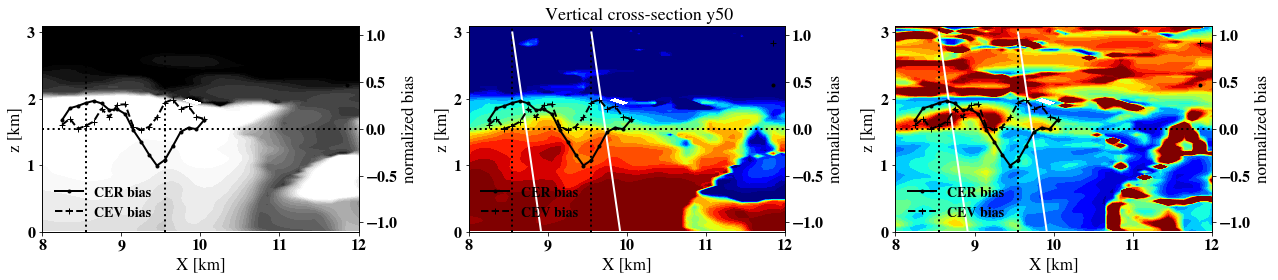

In [156]:
cpn.setup_figures(plt)
d_vza = 60
yi = 50
z = RC.DHARMA.z
x,y = RC.x/1e3,z/1e3
dTau = RC.dTau[1,:]
dRe = RC.VW.re_tau
dVe = RC.VW.ve_tau
ttau = dTau.sum(axis=0)

fig3,ax3 = plt.subplots(1,3,figsize=(18,4))
fig3_ttl = 'Vertical cross-section y%d'%(yi)
Bex = np.einsum('izxy->zxy',lc.RT_field.extp3d)
#ctf = plt.imshow(Bex[:,yi,:],origin='lower',cmap=plt.cm.binary_r,vmin=0,vmax=60)
#ctf = plt.imshow(dTau[:,yi,:],origin='lower',cmap=plt.cm.binary_r)
cmap_1 = plt.cm.binary_r
cmap_1.set_bad(color='red')
ctf0 = ax3[0].contourf(x,y,np.log10(dTau[:,yi,:]),np.linspace(-15,-2,21),extend='both',cmap=cmap_1)
ctf1 = ax3[1].contourf(x,y,np.log10(dRe[:,yi,:]) ,np.linspace(1,2,21),extend='both',cmap=plt.cm.jet)
ctf2 = ax3[2].contourf(x,y,dVe[:,yi,:],np.linspace(0,0.4,21),extend='both',cmap=plt.cm.jet)
#cpn.add_cb(fig3,ctf0,ax3[0],orientation='vertical',label=r'$log(d\tau)$',ticks=np.arange(-14,-1.99,2))
#cpn.add_cb(fig3,ctf1,ax3[1],orientation='vertical',label=r'$log(CER)$',ticks=np.arange(1,2.1,0.25))
#cpn.add_cb(fig3,ctf2,ax3[2],orientation='vertical',label=r'$CEV$',ticks=np.arange(0,0.41,0.1))
clr = ['k','k','k']
for i in range(3):
#    ax3[i].plot(x,z[RC.cot_top[yi,:]]/1e3,clr[i]+'-')
    bias = cpn.load_obj('/umbc/xfs1/zzbatmos/users/charaj1/taki/les_mscart_analysis/temp/re_bias')
    axy = ax3[i].twinx()
    axy.plot(bias['x'],bias['reb'],clr[i]+'.-',label = 'CER bias')
    axy.plot(bias['x'],bias['veb'],clr[i]+'+--',label = 'CEV bias')
    axy.legend(loc='lower left')
    axy.set_ylabel('normalized bias')
    axy.axhline(0,ls=':',color='k')
    ax3[i].axvline(x[85],ls=':',color=clr[i])
    ax3[i].axvline(x[95],ls=':',color=clr[i])
    ax3[i].set_ylim(0,3.1)
    ax3[i].set_xlim(8,12)
    ax3[i].set_xlabel('X [km]')
    ax3[i].set_ylabel('z [km]')
sensor = lc.RT.read_from_nml(54) # sensor altitude
ctop = 2.0 #RC.DHARMA.z[RC.cot_top[40,40]]/1e3
the = np.deg2rad(40-d_vza) # the=40-SZA
x_the = (sensor-ctop)*np.tan(the) # tan(40-SZA)=x/(sensor-ctop)
for i in [1,2]:
    ax3[i].plot([x[85]-x_the,x[85]],[0,sensor],'w-',label='cloud bow')
    ax3[i].plot([x[95]-x_the,x[95]],[0,sensor],'w-')
fig3.tight_layout(rect=[0,0,1,0.97])
fig3.suptitle(fig3_ttl)


cpn.savefig(fig3,fig3_ttl+'_zoomed','figures/temp/')

In [35]:
RC.VW.re_tau.shape

(100, 144, 144)

In [22]:
z[RC.cot_top[yi,:]]

masked_array(data=[2580., 2540., 2540., 2540., 2500., 2540., 2580., 2580.,
                   2580., 2620., 2660., 2700., 2700., 2700., 2700., 2700.,
                   2700., 2740., 2740., 2740., 2660., 2660., 2620., 2500.,
                   2540., 2580., 2700., 2700., 2740., 2740., 2740., 2740.,
                   2740., 2780., 2780., 2780., 2780., 2820., 2820., 2820.,
                   2820., 2700., 2660., 2660., 2660., 2660., 2660., 2620.,
                   2620., 2740., 2740., 2780., 2780., 2820., 2820., 2820.,
                   2780., 2700., 2380., 2380., 2380., 2420., 2420., 2420.,
                   2420., 2380., 2380., 2380., 2380., 2380., 2380., 2380.,
                   2420., 2420., 2420., 2420., 2420., 2420., 2700., 2740.,
                   2460., 2500., 2500., 2500., 2500., 2460., 2460., 2420.,
                   2380., 2340., 2340., 2340., 2620., 2660., 2660., 2660.,
                   2660., 2660., 2660., 2660., 2660., 2660., 2660., 2620.,
                   2580.,

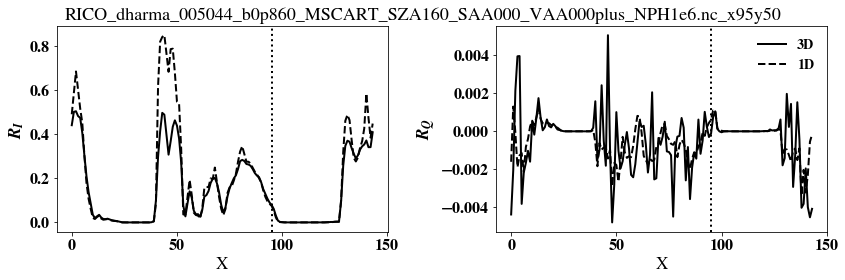

In [117]:
row,col = 50,95 # Interested point
fig1,ax1 = plt.subplots(1,2,figsize=(12,4))
fig1_ttl = lc.RT.fname+'_x%dy%d'%(col,row)
ax1[0].plot(lc.RT.MeanPRad[61,40,:,0],'k',label='3D')
ax1[0].plot(lc.RT1D.MeanPRad[61,40,:,0],'k--',label='1D')
ax1[1].plot(lc.RT.MeanPRad[61,40,:,1],'k',label='3D')
ax1[1].plot(lc.RT1D.MeanPRad[61,40,:,1],'k--',label='1D')
#plt.plot(RT.MeanPRad[61,40,:,0])
ax1[1].axvline(col,ls=':',color='k')
ax1[0].axvline(col,ls=':',color='k')
#ax1[1].set_xlim(0,50)
#ax1[0].set_xlim(0,50)
ax1[1].legend()
fig1.suptitle(fig1_ttl)
[ax.set_xlabel('X') for ax in [ax1[0],ax1[1]]]
ax1[1].set_ylabel(r'$R_Q$')
ax1[0].set_ylabel(r'$R_I$')
fig1.tight_layout(rect=[0,0,1,0.97])
#cpn.savefig(fig1,fig1_ttl,'figures/temp/')

Reading P12 library for polarimetric retrievals

In [38]:
P12Lib=Pol_ret_P12Lib(fname='Pol_ret_PM_library_0p860_2p13_V3.hdf5')
P12Lib.loadP12Lib()

In [162]:
RT.SZA

160.0

#### Performing retrievals
Give Rq as Q_in2. Include all scattering angles (~122)

In [120]:
from scipy.optimize import curve_fit
from cpnRetrievalslib import fitBreon_noRsq as do_fitting
P12Lib=Pol_ret_P12Lib(fname='Pol_ret_PM_library_0p860_2p13_V3.hdf5')
P12Lib.loadP12Lib()
method='Breon';rTyp='3D';tail='_pol_ret_V5'

RT=lc.RT1D

Q_in2=RT.MeanPRad[:,row,col,1]
#Q_in2=RT.MeanPRad[:,1]
muV=np.cos(np.deg2rad(RT.VZA))
muS=np.cos(np.deg2rad(180-RT.SZA))
obsSca=RT.ScatA
Qa1Qa2 = {160:[55,85],140:[35,65],120:[15,45]}


P=Pmat(P12Lib.re,P12Lib.ve,P12Lib.bulk_Mie_ang,P12Lib.avP12['0p860'],obsSca,method=method,primaryBow=True,SZA=RT.SZA)
#gemet=4*(muS+muV)*0+1#No geometric correction
gemet=4*(muS+muV)
try:
    cname=RT.fname.split('.',1)[0]
except AttributeError:
    cname=(RT.fname[0].astype(str)).split('.',1)[0]
ygabc=getGuess(cname,method,rTyp,tail)   
x=obsSca[P.Q_a1:P.Q_a2]
y=(-Q_in2*gemet)[P.Q_a1:P.Q_a2]
#ret_Re,ret_Ve,abc,Qls,Rsq=do_fitting(x,np.squeeze(y),P,ygabc)
#out=do_fitting(x,np.squeeze(y),P,ygabc)
out = do_fitting(x,np.squeeze(y),P,ygabc)
ret_Re,ret_Ve=out[0],out[1]
abc=out[2]
Qls=out[3]
Rsq=out[4]

Pol. ret. method: Breon primaryBow: True
Qa1Qa2: [55, 85]
Domain mean retrievals exist: RICO_dharma_005044_b0p860_MSCART_1D_bins_SZA160_SAA000_VAA000plus_NPH1e6_Breon_mean_pol_ret_V5
Attempting to read <class 'dict'>
Domain mean retrievals will be used as the initial guess.


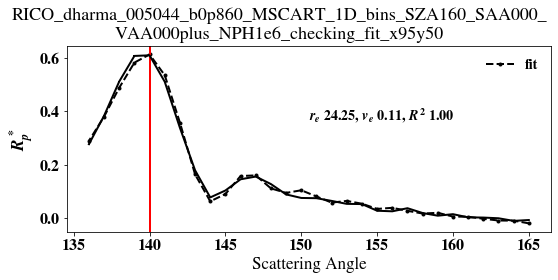

In [121]:
yerr=(RT.RMSEPRad[:,row,col,1]*gemet)[P.Q_a1:P.Q_a2]
#yerr=(RT.RMSEPRad[:,1]*gemet)[P.Q_a1:P.Q_a2]
fig6_ttl=RT.fname+'_checking_fit_x%dy%d'%(col,row)
#fig1,ax1=check_fit2(y,x,out[2],out[0],out[1],out[4],P12Lib,LEScase,method,primaryBow=primaryBow)

fig6,ax6=plt.subplots(figsize=(8,4))
P.set_reve(ret_Re,ret_Ve)
ax6.plot(x,P.imitateF(x,*abc),'k.--',label='fit')
ax6.errorbar(x,y,yerr=yerr,color='k')
#    ax6.plot(RT.ScatA[P.Q_a1:P.Q_a2],-P.getP(RT.ScatA[P.Q_a1:P.Q_a2]),'r--')
ax6.text(0.5,0.6,r'$r_e$ %0.2f, $v_e$ %0.2f, $R^2$ %0.2f'%(ret_Re,ret_Ve,Rsq),transform=ax6.transAxes,size=14)
ax6.set_xlabel('Scattering Angle')
ax6.set_ylabel(r'$R_p^*$')
ax6.legend(frameon=False,loc='best')
ax6.axvline(140,ls='-',color='r')
fig6.suptitle("\n".join(wrap(fig6_ttl,55)))
fig6.tight_layout(rect=[0,0,1,0.90])
#cpn.savefig(fig6,fig6_ttl,'figures/parallax/')
#fig6.tight_layout()
#cpn.savefig(fig6,'c'+fig6_ttl,'figures/parallax/')

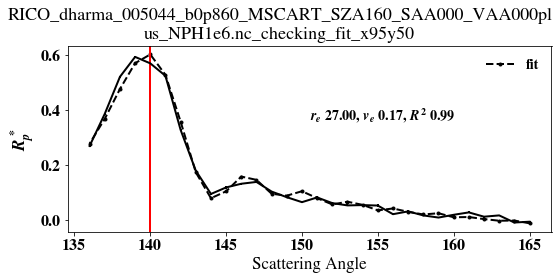

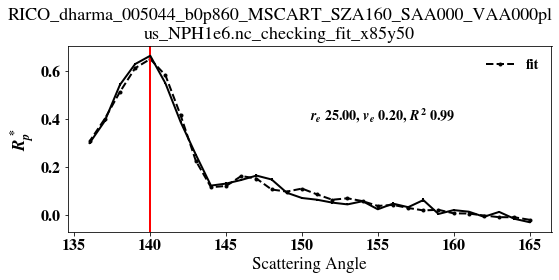

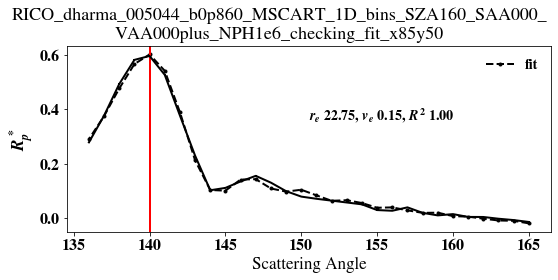

In [62]:
cpn.savefig(fig6,fig6_ttl+'_corrected','figures/')

figures/ATEXc_dharma_007877_b0p860y120x79_MSCART_SZA140_SAA000_VAA000plus_NPH1e5pnc_checking_fit_corrected.png SAVED.


In [198]:
RT=POLCARTdset('onecolumn','/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/ATEXc/1Druns/LESb0p860_bins/')
RT.readMSCARTplus('ATEXc_dharma_007877_b0p860y120x79_MSCART_SZA140_SAA000_VAA000plus_NPH1e7.nc',\
                  fdpath='/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/ATEXc/1Druns/results/LESb0p860_bins/',clm=True,prnt=False,step=True)




(30,)

P

In [287]:
qq=np.array(P.findQa1a2_2(obsSca,135,165))

either one angle has only one occurrence


In [288]:
qq[0]

85

In [30]:
X['1e7']=x
Y['1e7']=y
Yerr['1e7']=yerr

In [48]:
y.shape

(31,)

In [51]:
Q_in2[P.Q_a1:P.Q_a2].shape

(31,)

In [203]:
help(plt.errorbar)

Help on function errorbar in module matplotlib.pyplot:

errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)
    Plot y versus x as lines and/or markers with attached errorbars.
    
    *x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
    sizes. By default, this draws the data markers/lines as well the
    errorbars. Use fmt='none' to draw errorbars without any data markers.
    
    Parameters
    ----------
    x, y : scalar or array-like
        The data positions.
    
    xerr, yerr : scalar or array-like, shape(N,) or shape(2,N), optional
        The errorbar sizes:
    
        - scalar: Symmetric +/- values for all data points.
        - shape(N,): Symmetric +/-values for each data point.
        - shape(2,N): Separate - and + values for each bar. First row
            contains the lower errors

In [53]:
P.Q_a2

66